# CVAI: Compression

## Aufgabe 1

Wählen Sie aus dem u. g. Binärbild eine Zeile aus. Implementieren Sie eine Lauflängencodierung und codieren Sie die Zeile. Implementieren Sie die Decodierung und überprüfen Sie, ob die wieder decodierte Zeile mit der Originalzeile übereinstimmt.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

In [2]:
Image0 = cv.imread (path + 'lenna-bw-bin.pbm')
print (Image0.shape)

(512, 512, 3)


In [3]:
Image1 = cv.cvtColor (Image0, cv.COLOR_BGR2GRAY)
print (Image1.shape, np.min (Image1), np.max (Image1))

(512, 512) 0 255


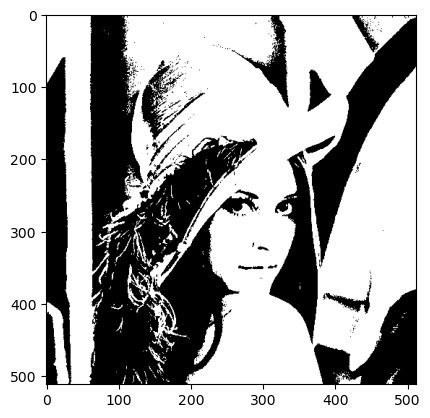

In [4]:
pl.imshow (Image1, cmap = 'gray')

In [5]:
Image = Image1 // 255
print ('shape =', Image.shape, ', min =', np.min (Image), ', max =', np.max (Image))

shape = (512, 512) , min = 0 , max = 1


In [6]:
LineNumber = 10

In [7]:
Line = Image [LineNumber, :]
print (Line.shape)

(512,)


(32, 512)


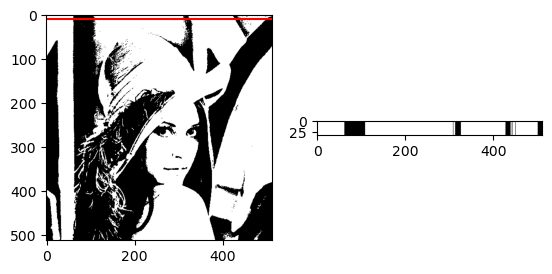

In [8]:
Thickness = 32
Thickline = np.tile (Line, (Thickness, 1))
print (Thickline.shape)

pl.subplot (1, 2, 1)
pl.imshow (Image, cmap = 'gray')
pl.plot ([0, Line.shape [0] - 1], [LineNumber, LineNumber], 'red')

pl.subplot (1, 2, 2)
pl.imshow (Thickline, cmap = 'gray')

In [9]:
def RLencode (array):
    last = 0
    count = 0
    result = []
    for value in array:
        if value == last:
            count += 1
        else:
            result.append (count)
            last = value
            count = 1
    if count > 0:
        result.append (count)
    return np.array (result)

In [10]:
Encoded = RLencode (Line)
print (Encoded.shape)
print (Encoded)
print (max (Encoded))

(17,)
[  0  62  47 199   1   4  13 101  11   1   1   2   1   6   1  50  12]
199


In [11]:
def RLdecode (enc):
    value = 0
    result = []
    for count in enc:
        result.extend ([value] * count)
        value = 1 - value
    return np.array (result)

In [12]:
Decoded = RLdecode (Encoded)
print (Decoded.shape)

(512,)


In [13]:
def Difference (image0, image1):
    return max (abs (Line - Decoded))

In [14]:
print (Difference (Image, Decoded))

0


Setzen Sie alle Zeilen des Bildes zu einer einzigen Zeile zusammen und wiederholen Sie obige Rechnung. Stellen Sie das wieder decodierte Bild dar.

In [15]:
Original = Image.flatten()
print (Original.shape)

(262144,)


In [16]:
Encoded = RLencode (Original)
print (Encoded.shape, max (Encoded))

(12059,) 244


In [17]:
print (Difference (Original, RLdecode (Encoded)))

0


In [18]:
print (Original.shape [0] / 8, Encoded.shape [0])

32768.0 12059


In [19]:
Encoded1 = [0]
Encoded1.extend (Encoded)

In [20]:
Decoded1 = RLdecode (Encoded1)

Ändern Sie das codierte Bild so ab, dass es beim Decodieren negativ dargestellt wird.

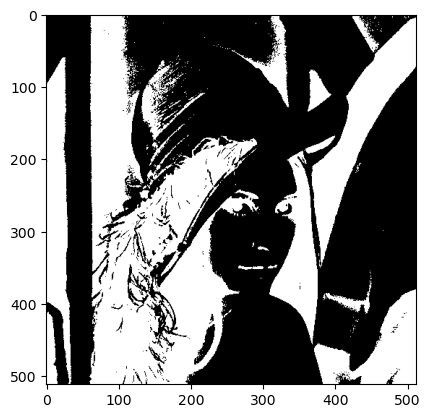

In [21]:
pl.imshow (Decoded1.reshape (Image.shape), cmap = 'gray')

## Aufgabe 2

Implementieren Sie die LZW-Komprimierung und -Dekomprimierung in Python. Verwenden Sie die Beispiele aus der Vorlesung, um Ihre Implementationen zu überprüfen.

In [22]:
def lzw_compress(input_string):
    # Initialisiere das Dictionary mit ASCII-Zeichen (0-255)
    dict_size = 256
    dictionary = {chr(i): i for i in range(dict_size)}
    
    lw = ""  # Letztes Wort (LW)
    compressed_output = []
    
    for char in input_string:
        lw_cc = lw + char  # Erweitere das aktuelle Wort
        
        if lw_cc in dictionary:
            lw = lw_cc
        else:
            compressed_output.append(dictionary[lw])  # Gib den Index von LW aus
            dictionary[lw_cc] = dict_size  # Füge neues Muster ins Dictionary
            dict_size += 1
            lw = char  # Setze LW auf das aktuelle Zeichen

    # Ausgabe des letzten verbleibenden Musters
    if lw:
        compressed_output.append(dictionary[lw])
    
    return compressed_output

# Test mit Beispielstring
input_string = "rabarbarabarbara"
compressed = lzw_compress(input_string)
print(compressed)


[114, 97, 98, 97, 114, 258, 256, 261, 261, 97]


In [23]:
def lzw_decompress(compressed):
    # Initialisiere das Dictionary mit ASCII-Zeichen (0-255)
    dict_size = 256
    dictionary = {i: chr(i) for i in range(dict_size)}

    # Der erste Code wird direkt ausgegeben
    lw = chr(compressed.pop(0))
    decompressed_output = [lw]

    for code in compressed:
        if code in dictionary:
            entry = dictionary[code]
        elif code == dict_size:
            entry = lw + lw[0]  # Spezialfall: Code entspricht der nächsten freien Position im Dictionary
        else:
            raise ValueError("Fehler in der Dekomprimierung")

        decompressed_output.append(entry)
        dictionary[dict_size] = lw + entry[0]  # Neues Muster ins Dictionary einfügen
        dict_size += 1
        lw = entry  # LW aktualisieren

    return "".join(decompressed_output)


# Test mit vorher komprimierten Daten
input_string = "rabarbarabarbara"
compressed = lzw_compress(input_string)
decompressed = lzw_decompress(compressed)

print("Komprimiert:", compressed)
print("Dekomprimiert:", decompressed)


Komprimiert: [97, 98, 97, 114, 258, 256, 261, 261, 97]
Dekomprimiert: rabarbarabarbara
